In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('data_science_job_data.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.shape

(19158, 13)

In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [6]:
df.isnull().sum()/len(df)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

## Checking the columns with less than 5% of missing values¶

In [7]:
missing_columns_5percent = [col for col in df.columns if df[col].isnull().mean() >0 and df[col].isnull().mean() <=0.05]
missing_columns_5percent

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
df[missing_columns_5percent].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [15]:
X = df[['experience','training_hours']]
y = df['target']

In [74]:
X.head()

,experience,training_hours
0,20.0,36.0
1,15.0,47.0
2,5.0,83.0
3,0.0,52.0
4,20.0,8.0


In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y , random_state=1 , test_size=0.2)

In [17]:
X_train.shape , y_train.shape

((15326, 2), (15326,))

In [18]:
mean_experience = X_train['experience'].mean()
median_experience = X_train['experience'].median()

mean_training_hours = X_train['training_hours'].mean()
median_training_hours = X_train['training_hours'].median()

In [19]:
X_train['experience_mean']  = X_train['experience'].fillna(mean_experience)
X_train['experience_median']  = X_train['experience'].fillna(median_experience)

X_train['training_hours_mean']  = X_train['training_hours'].fillna(mean_training_hours)
X_train['training_hours_median']  = X_train['training_hours'].fillna(median_training_hours)

In [55]:
print('Original variance of expeience: ',round(X_train['experience'].var(),2))
print('Variance of expeience after mean imputation: ',round(X_train['experience_mean'].var(),2))
print('Variance of expeience after median imputation: ',round(X_train['experience_median'].var(),2))
print()
print('Original variance of training_hours: ',round(X_train['training_hours'].var(),2))
print('Variance of training_hours after mean imputation: ',round(X_train['training_hours_mean'].var(),2))
print('Variance of training_hours after median imputation: ',round(X_train['training_hours_median'].var(),2))

Original variance of expeience:  42.34
Variance of expeience after mean imputation:  42.21
Variance of expeience after median imputation:  42.21

Original variance of training_hours:  3579.37
Variance of training_hours after mean imputation:  3437.6
Variance of training_hours after median imputation:  3450.41


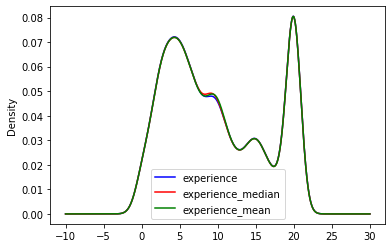

In [58]:
import matplotlib.pyplot as plt

# original variable distribution
X_train['experience'].plot(kind='kde', color='blue')

# variable imputed with the median
X_train['experience_median'].plot(kind='kde',color='red')

# variable imputed with the mean
X_train['experience_mean'].plot(kind='kde',  color='green')

# add legends
plt.legend()
plt.show()

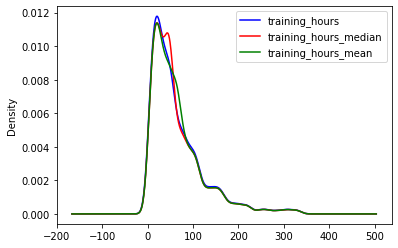

In [59]:
# original variable distribution
X_train['training_hours'].plot(kind='kde', color='blue')

# variable imputed with the median
X_train['training_hours_median'].plot(kind='kde',color='red')

# variable imputed with the mean
X_train['training_hours_mean'].plot(kind='kde',  color='green')

# add legends
plt.legend()
plt.show()

In [60]:
X_train.cov()

,experience,training_hours,experience_mean,experience_median,training_hours_mean,training_hours_median
experience,42.341773,-0.881855,42.341773,42.341773,-0.847451,-0.458800
training_hours,-0.881855,3579.374086,-0.879580,-0.902106,3579.374086,3579.374086
experience_mean,42.341773,-0.879580,42.206390,42.206390,-0.844742,-0.457333
experience_median,42.341773,-0.902106,42.206390,42.209068,-0.866375,-0.478901
training_hours_mean,-0.847451,3579.374086,-0.844742,-0.866375,3437.600508,3437.600508
training_hours_median,-0.458800,3579.374086,-0.457333,-0.478901,3437.600508,3450.405968


In [61]:
X_train.corr()

,experience,training_hours,experience_mean,experience_median,training_hours_mean,training_hours_median
experience,1.000000,-0.002264,1.000000,1.000000,-0.002222,-0.001201
training_hours,-0.002264,1.000000,-0.002261,-0.002319,1.000000,1.000000
experience_mean,1.000000,-0.002261,1.000000,0.999968,-0.002218,-0.001198
experience_median,1.000000,-0.002319,0.999968,1.000000,-0.002274,-0.001255
training_hours_mean,-0.002222,1.000000,-0.002218,-0.002274,1.000000,0.998143
training_hours_median,-0.001201,1.000000,-0.001198,-0.001255,0.998143,1.000000


<AxesSubplot:>

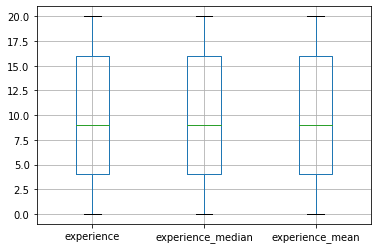

In [62]:
X_train[['experience', 'experience_median', 'experience_mean']].boxplot()

<AxesSubplot:>

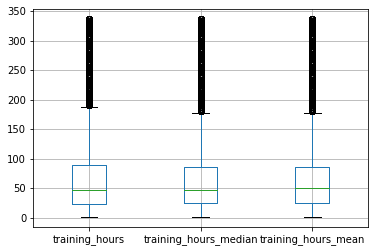

In [63]:
X_train[['training_hours', 'training_hours_median', 'training_hours_mean']].boxplot()

## Using scikit-learn

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [82]:
X = df[['experience','training_hours']]
y = df['target']

In [66]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y , random_state=1 , test_size=0.2)

In [67]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [68]:
trf = ColumnTransformer([
      ('imputer1' , imputer1 , ['experience']),
      ('imputer2' , imputer2 , ['training_hours'])])

In [69]:
trf.fit(X_train)

ColumnTransformer(transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['experience']),
                                ('imputer2', SimpleImputer(),
                                 ['training_hours'])])

In [70]:
trf.named_transformers_['imputer1'].statistics_

array([9.])

In [71]:
trf.named_transformers_['imputer2'].statistics_

array([65.34757796])

In [72]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [73]:
X_train

array([[ 20.,  26.],
       [ 10.,  25.],
       [ 20.,  66.],
       ...,
       [ 16., 130.],
       [  8., 111.],
       [ 19.,   4.]])

## Handling missing data using some arbitrary numbers

In [78]:
X = df[['experience','training_hours']]
y = df['target']

from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y , random_state=1 , test_size=0.2)

X_train['experience_99']  = X_train['experience'].fillna(99)
X_train['experience_1']  = X_train['experience'].fillna(-1)

X_train['training_hours_999']  = X_train['training_hours'].fillna(999)
X_train['training_hours_1']  = X_train['training_hours'].fillna(-1)

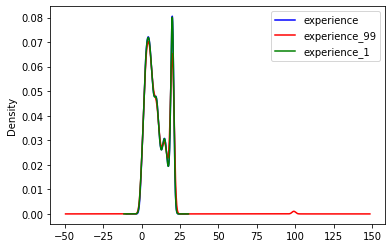

In [76]:
import matplotlib.pyplot as plt

# original variable distribution
X_train['experience'].plot(kind='kde', color='blue')

# variable imputed with the median
X_train['experience_99'].plot(kind='kde',color='red')

# variable imputed with the mean
X_train['experience_1'].plot(kind='kde',  color='green')

# add legends
plt.legend()
plt.show()

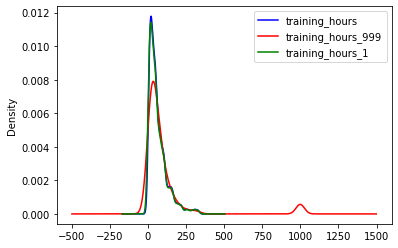

In [79]:
# original variable distribution
X_train['training_hours'].plot(kind='kde', color='blue')

# variable imputed with the median
X_train['training_hours_999'].plot(kind='kde',color='red')

# variable imputed with the mean
X_train['training_hours_1'].plot(kind='kde',  color='green')

# add legends
plt.legend()
plt.show()

In [80]:
## Using scikit-learn

imputer1 = SimpleImputer(strategy='constant' , fill_value=99)
imputer2 = SimpleImputer(strategy='constant' , fill_value=999)

In [83]:
X = df[['experience','training_hours']]
y = df['target']

from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y , random_state=1 , test_size=0.2)

In [86]:
trf = ColumnTransformer([
      ('imputer1' , imputer1 , ['experience']),
      ('imputer2' , imputer2 , ['training_hours'])])

In [87]:
trf.fit(X_train)

ColumnTransformer(transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['experience']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['training_hours'])])